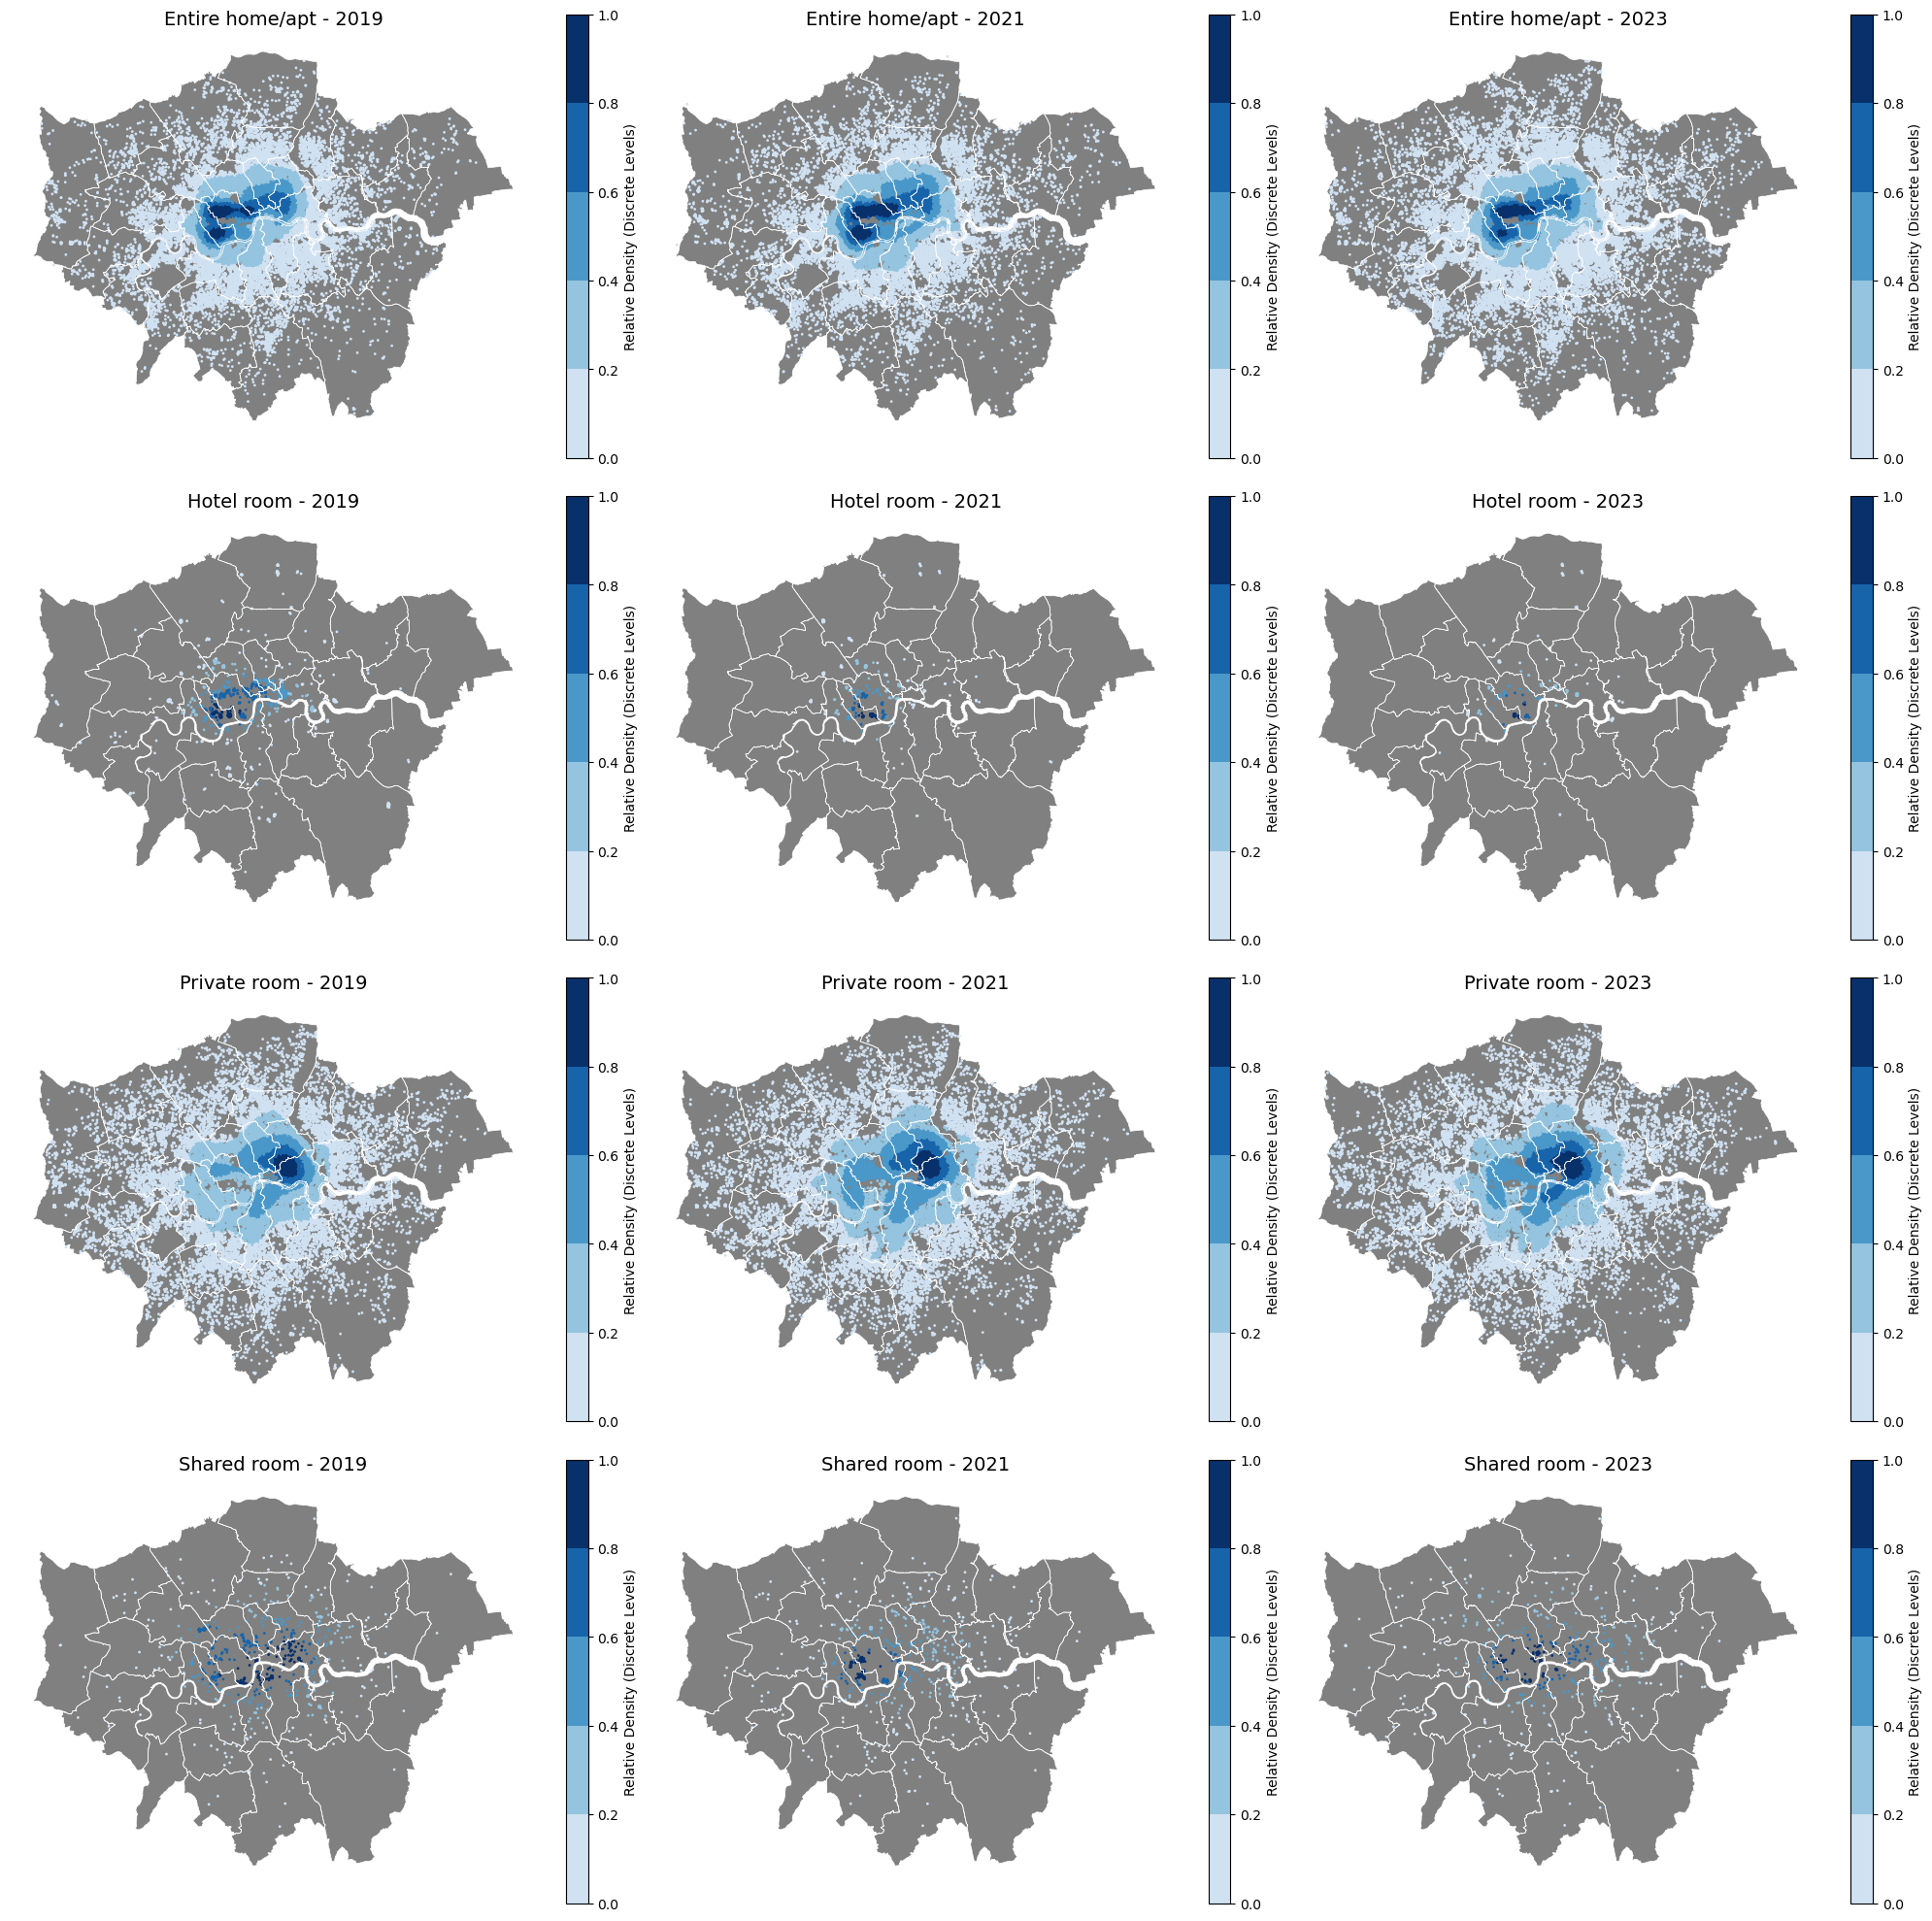

In [9]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import ScalarMappable


# 定义本地数据路径
csv_folder = os.path.join('', 'cleaned_data')
shapefile_folder = os.path.join('', 'statistical-gis-boundaries-london', 'ESRI')
shapefile_path = os.path.join(shapefile_folder, 'London_Borough_Excluding_MHW.shp')

csv_files = {
    2019: os.path.join(csv_folder, "cleaned_2019_data.csv"),
    2021: os.path.join(csv_folder, "cleaned_2021_data.csv"),
    2023: os.path.join(csv_folder, "cleaned_2023_data.csv")
}

boroughs = gpd.read_file(shapefile_path)
boroughs = boroughs.to_crs(epsg=4326)

# 定义房源类型列表（行方向）
room_types = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

# 创建4行3列子图
fig, axes = plt.subplots(len(room_types), len(csv_files), figsize=(20, 20))

# 定义分级边界
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# 从Blues中截取出一组颜色，使最低值不再是接近白色
orig_cmap = plt.get_cmap('Blues')
newcolors = orig_cmap(np.linspace(0.2, 1, len(bins)-1))
new_cmap = ListedColormap(newcolors)

# 使用 BoundaryNorm 根据 bins 创建分段的颜色映射规则
norm = BoundaryNorm(bins, ncolors=new_cmap.N, extend='neither')
mappable = ScalarMappable(norm=norm, cmap=new_cmap)
mappable.set_array([])

# 遍历房源类型与年份
for row, rtype in enumerate(room_types):
    for col, year in enumerate(csv_files.keys()):
        df = pd.read_csv(csv_files[year])
        # 筛选指定room_type的数据
        df = df[df['room_type'] == rtype]
        
        ax = axes[row, col]
        
        if df.empty:
            # 若无数据，直接显示底图和文本提示
            boroughs.plot(ax=ax, facecolor='grey')
            boroughs.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5, alpha=1.0, zorder=3)
            ax.set_title(f"{rtype} - {year}\nNo Data", fontsize=14)
            ax.axis('off')
            continue
        
        # 确保有经纬度列
        if 'longitude' not in df.columns or 'latitude' not in df.columns:
            raise ValueError(f"{year}年的数据中缺少经纬度列（longitude或latitude）。")

        gdf = gpd.GeoDataFrame(
            df,
            geometry=gpd.points_from_xy(df.longitude, df.latitude),
            crs='EPSG:4326'
        )

        # KDE计算
        xy = np.vstack([df['longitude'], df['latitude']])
        kde = gaussian_kde(xy, bw_method='silverman')
        kde_values = kde(xy)
        norm_kde_values = kde_values / max(kde_values)

        # 分级映射颜色
        discrete_colors = new_cmap(norm(norm_kde_values))

        boroughs.plot(ax=ax, facecolor='grey')
        
        # 绘制点数据
        gdf.plot(ax=ax, marker='o', color=discrete_colors, markersize=1)

        # 绘制白色边线
        boroughs.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5, alpha=1.0, zorder=3)

        # 设置标题
        ax.set_title(f"{rtype} - {year}", fontsize=14)
        ax.axis('off')

        # 添加颜色条（只需给每列的第一个子图添加，或给每个都添加，可根据需要调整）
        cb = plt.colorbar(mappable, ax=ax, fraction=0.04, pad=0.05, boundaries=bins, ticks=bins)
        cb.set_label("Relative Density (Discrete Levels)")

plt.tight_layout()
plt.savefig('All room type Distribution.png', dpi=300)
plt.show()

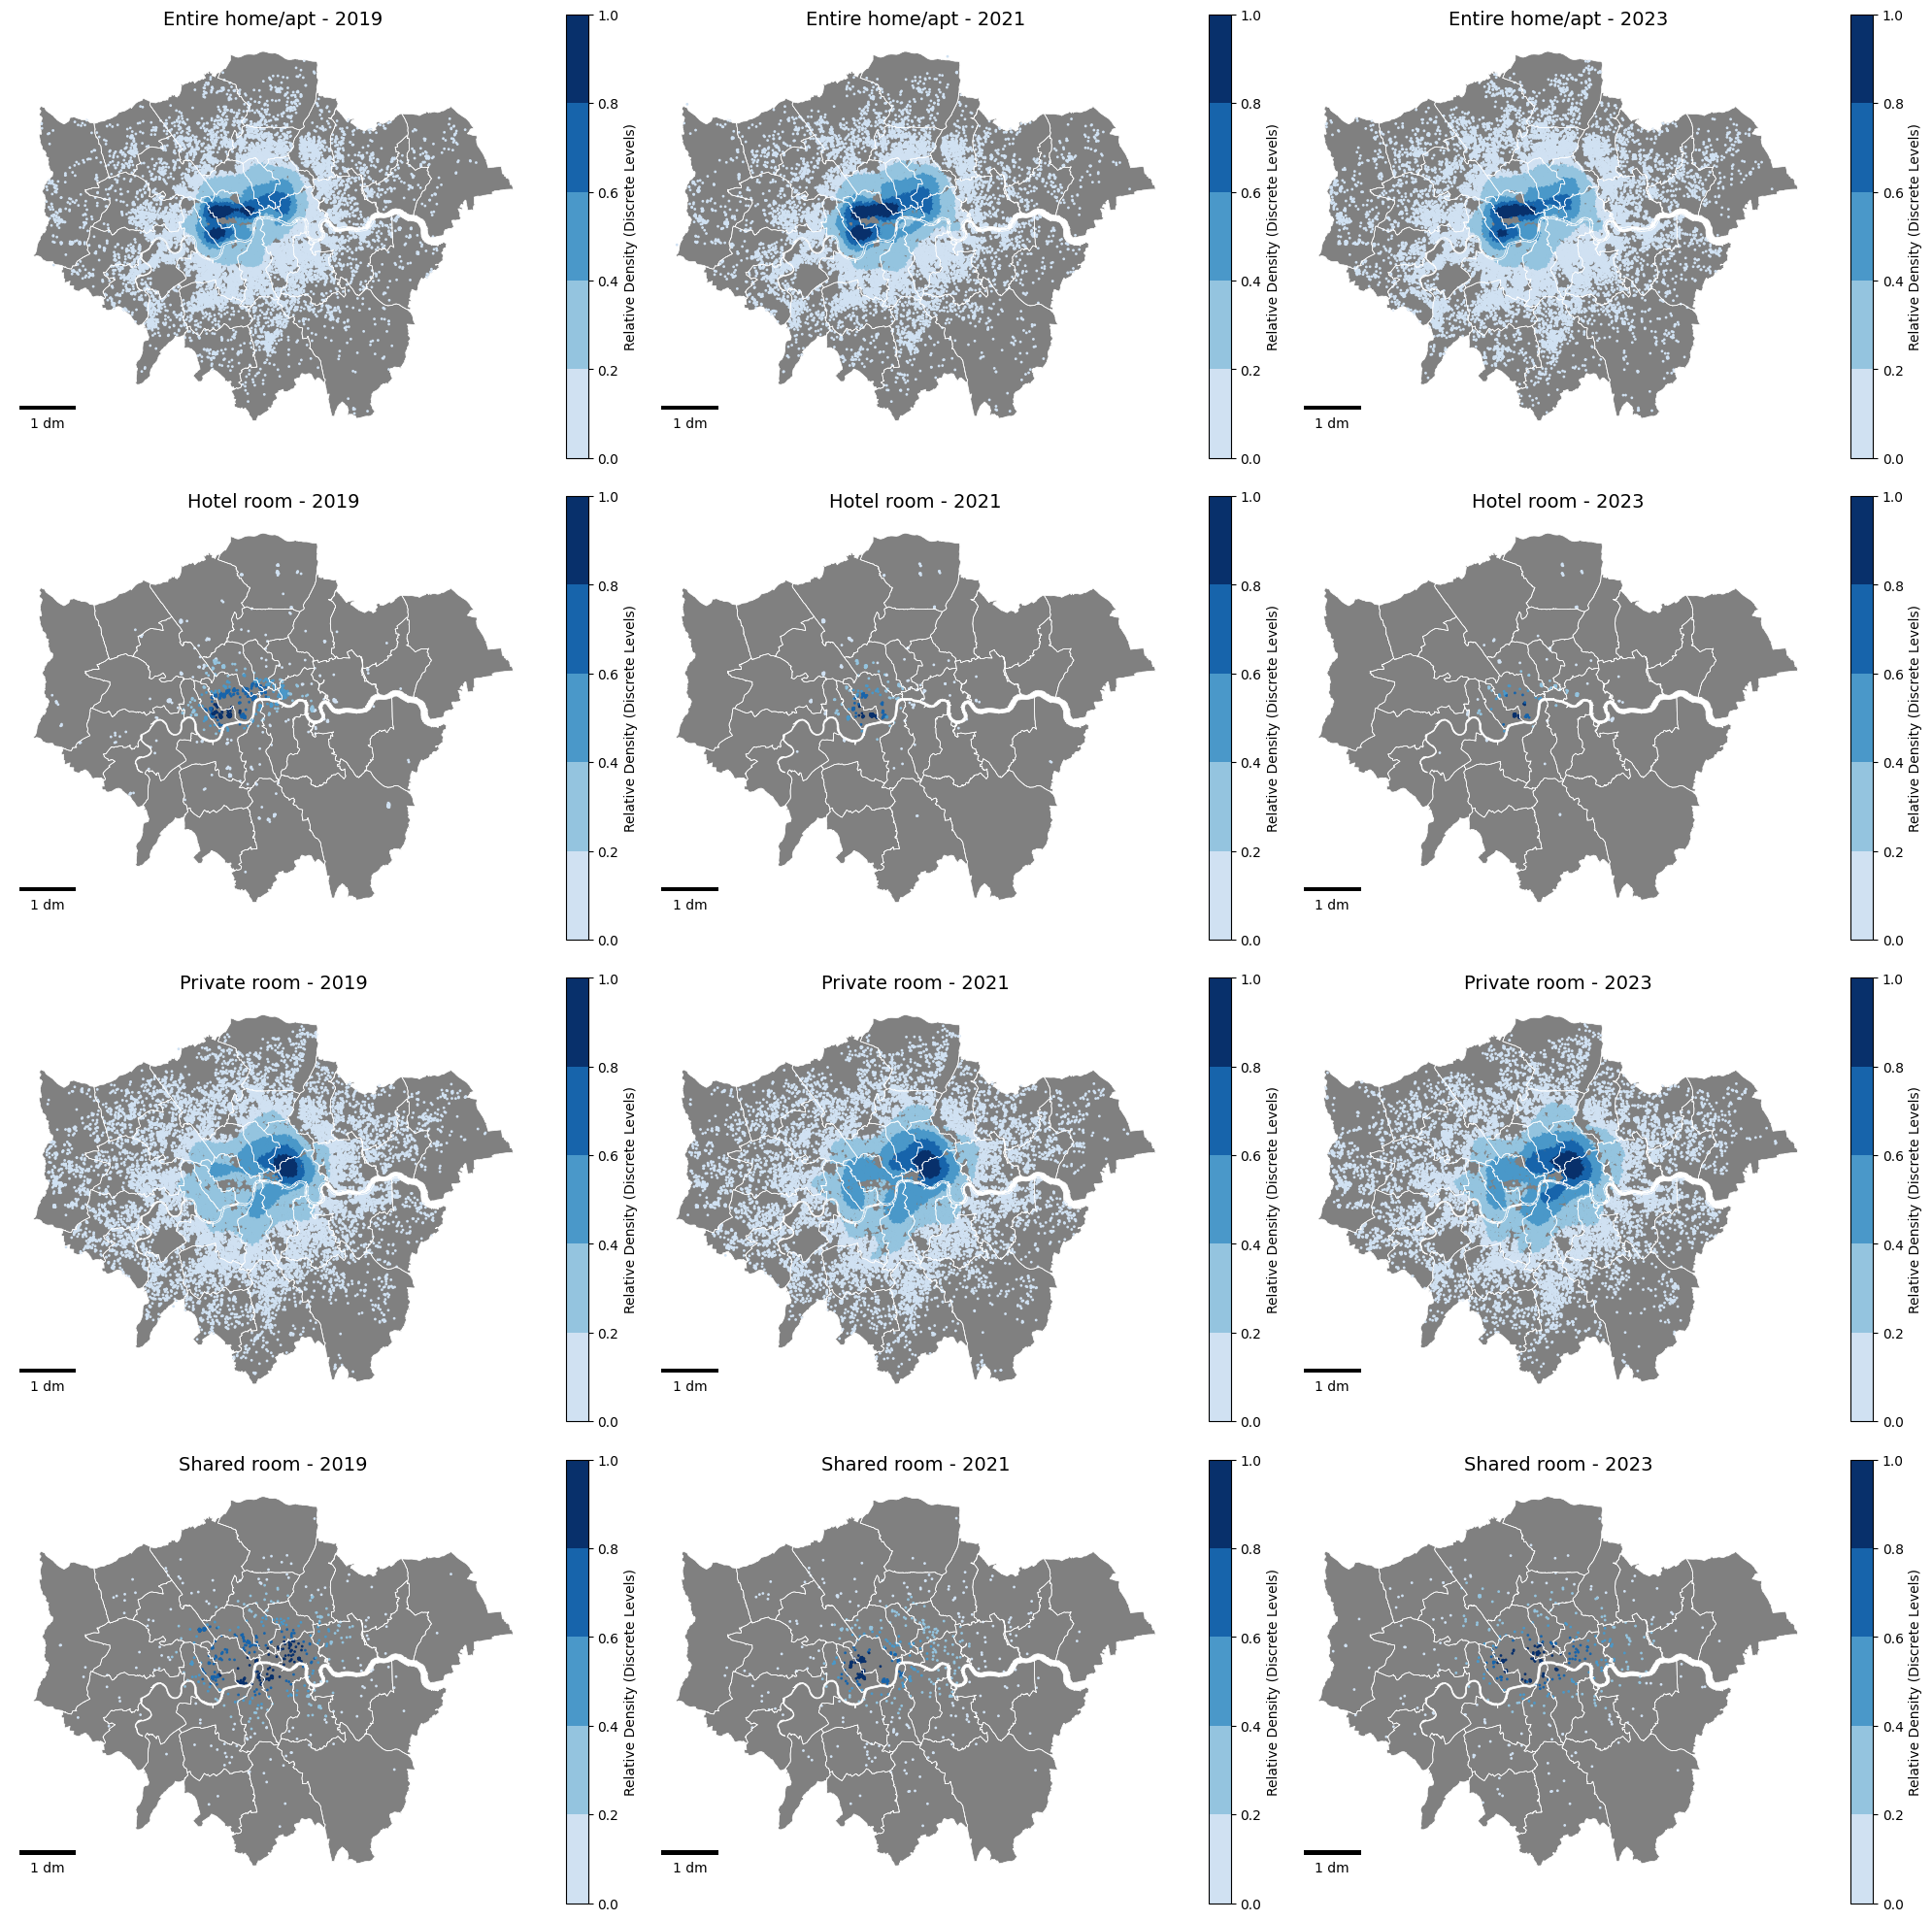

In [9]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib_scalebar.scalebar import ScaleBar


csv_urls = {
    2019: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2019_data.csv",
    2021: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2021_data.csv",
    2023: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2023_data.csv"
}

shapefile_url = "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/data/London_Borough/London_Borough_Excluding_MHW.shp"

boroughs = gpd.read_file(shapefile_url)
boroughs = boroughs.to_crs(epsg=4326)

# 定义房源类型列表（行方向）
room_types = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

# 创建4行3列子图
fig, axes = plt.subplots(len(room_types), len(csv_urls), figsize=(20, 20))

# 定义分级边界
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# 从Blues中截取出一组颜色，使最低值不再是接近白色
orig_cmap = plt.get_cmap('Blues')
newcolors = orig_cmap(np.linspace(0.2, 1, len(bins)-1))
new_cmap = ListedColormap(newcolors)

# 使用 BoundaryNorm 根据 bins 创建分段的颜色映射规则
norm = BoundaryNorm(bins, ncolors=new_cmap.N, extend='neither')
mappable = ScalarMappable(norm=norm, cmap=new_cmap)
mappable.set_array([])

# 遍历房源类型与年份
for row, rtype in enumerate(room_types):
    for col, year in enumerate(csv_urls.keys()):
        df = pd.read_csv(csv_urls[year])
        # 筛选指定room_type的数据
        df = df[df['room_type'] == rtype]
        
        ax = axes[row, col]
        
        if df.empty:
            # 若无数据，直接显示底图和文本提示
            boroughs.plot(ax=ax, facecolor='grey')
            boroughs.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5, alpha=1.0, zorder=3)
            ax.set_title(f"{rtype} - {year}\nNo Data", fontsize=14)
            ax.axis('off')
            continue
        
        # 确保有经纬度列
        if 'longitude' not in df.columns or 'latitude' not in df.columns:
            raise ValueError(f"{year}年的数据中缺少经纬度列（longitude或latitude）。")

        gdf = gpd.GeoDataFrame(
            df,
            geometry=gpd.points_from_xy(df.longitude, df.latitude),
            crs='EPSG:4326'
        )

        # KDE计算
        xy = np.vstack([df['longitude'], df['latitude']])
        kde = gaussian_kde(xy, bw_method='silverman')
        kde_values = kde(xy)
        norm_kde_values = kde_values / max(kde_values)

        # 分级映射颜色
        discrete_colors = new_cmap(norm(norm_kde_values))

        boroughs.plot(ax=ax, facecolor='grey')
        
        # 绘制点数据
        gdf.plot(ax=ax, marker='o', color=discrete_colors, markersize=1)

        # 绘制白色边线
        boroughs.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5, alpha=1.0, zorder=3)

        # 设置标题
        ax.set_title(f"{rtype} - {year}", fontsize=14)
        ax.axis('off')

        # 添加比例尺
        scalebar = ScaleBar(1, units="m", dimension="si-length", color="black", box_color="white", box_alpha=1.0, location="lower left", border_pad=0.5)
        ax.add_artist(scalebar)

        # 添加颜色条（只需给每列的第一个子图添加，或给每个都添加，可根据需要调整）
        cb = plt.colorbar(mappable, ax=ax, fraction=0.04, pad=0.05, boundaries=bins, ticks=bins)
        cb.set_label("Relative Density (Discrete Levels)")

plt.tight_layout()
plt.savefig('All room type Distribution.png', dpi=300)
plt.show()

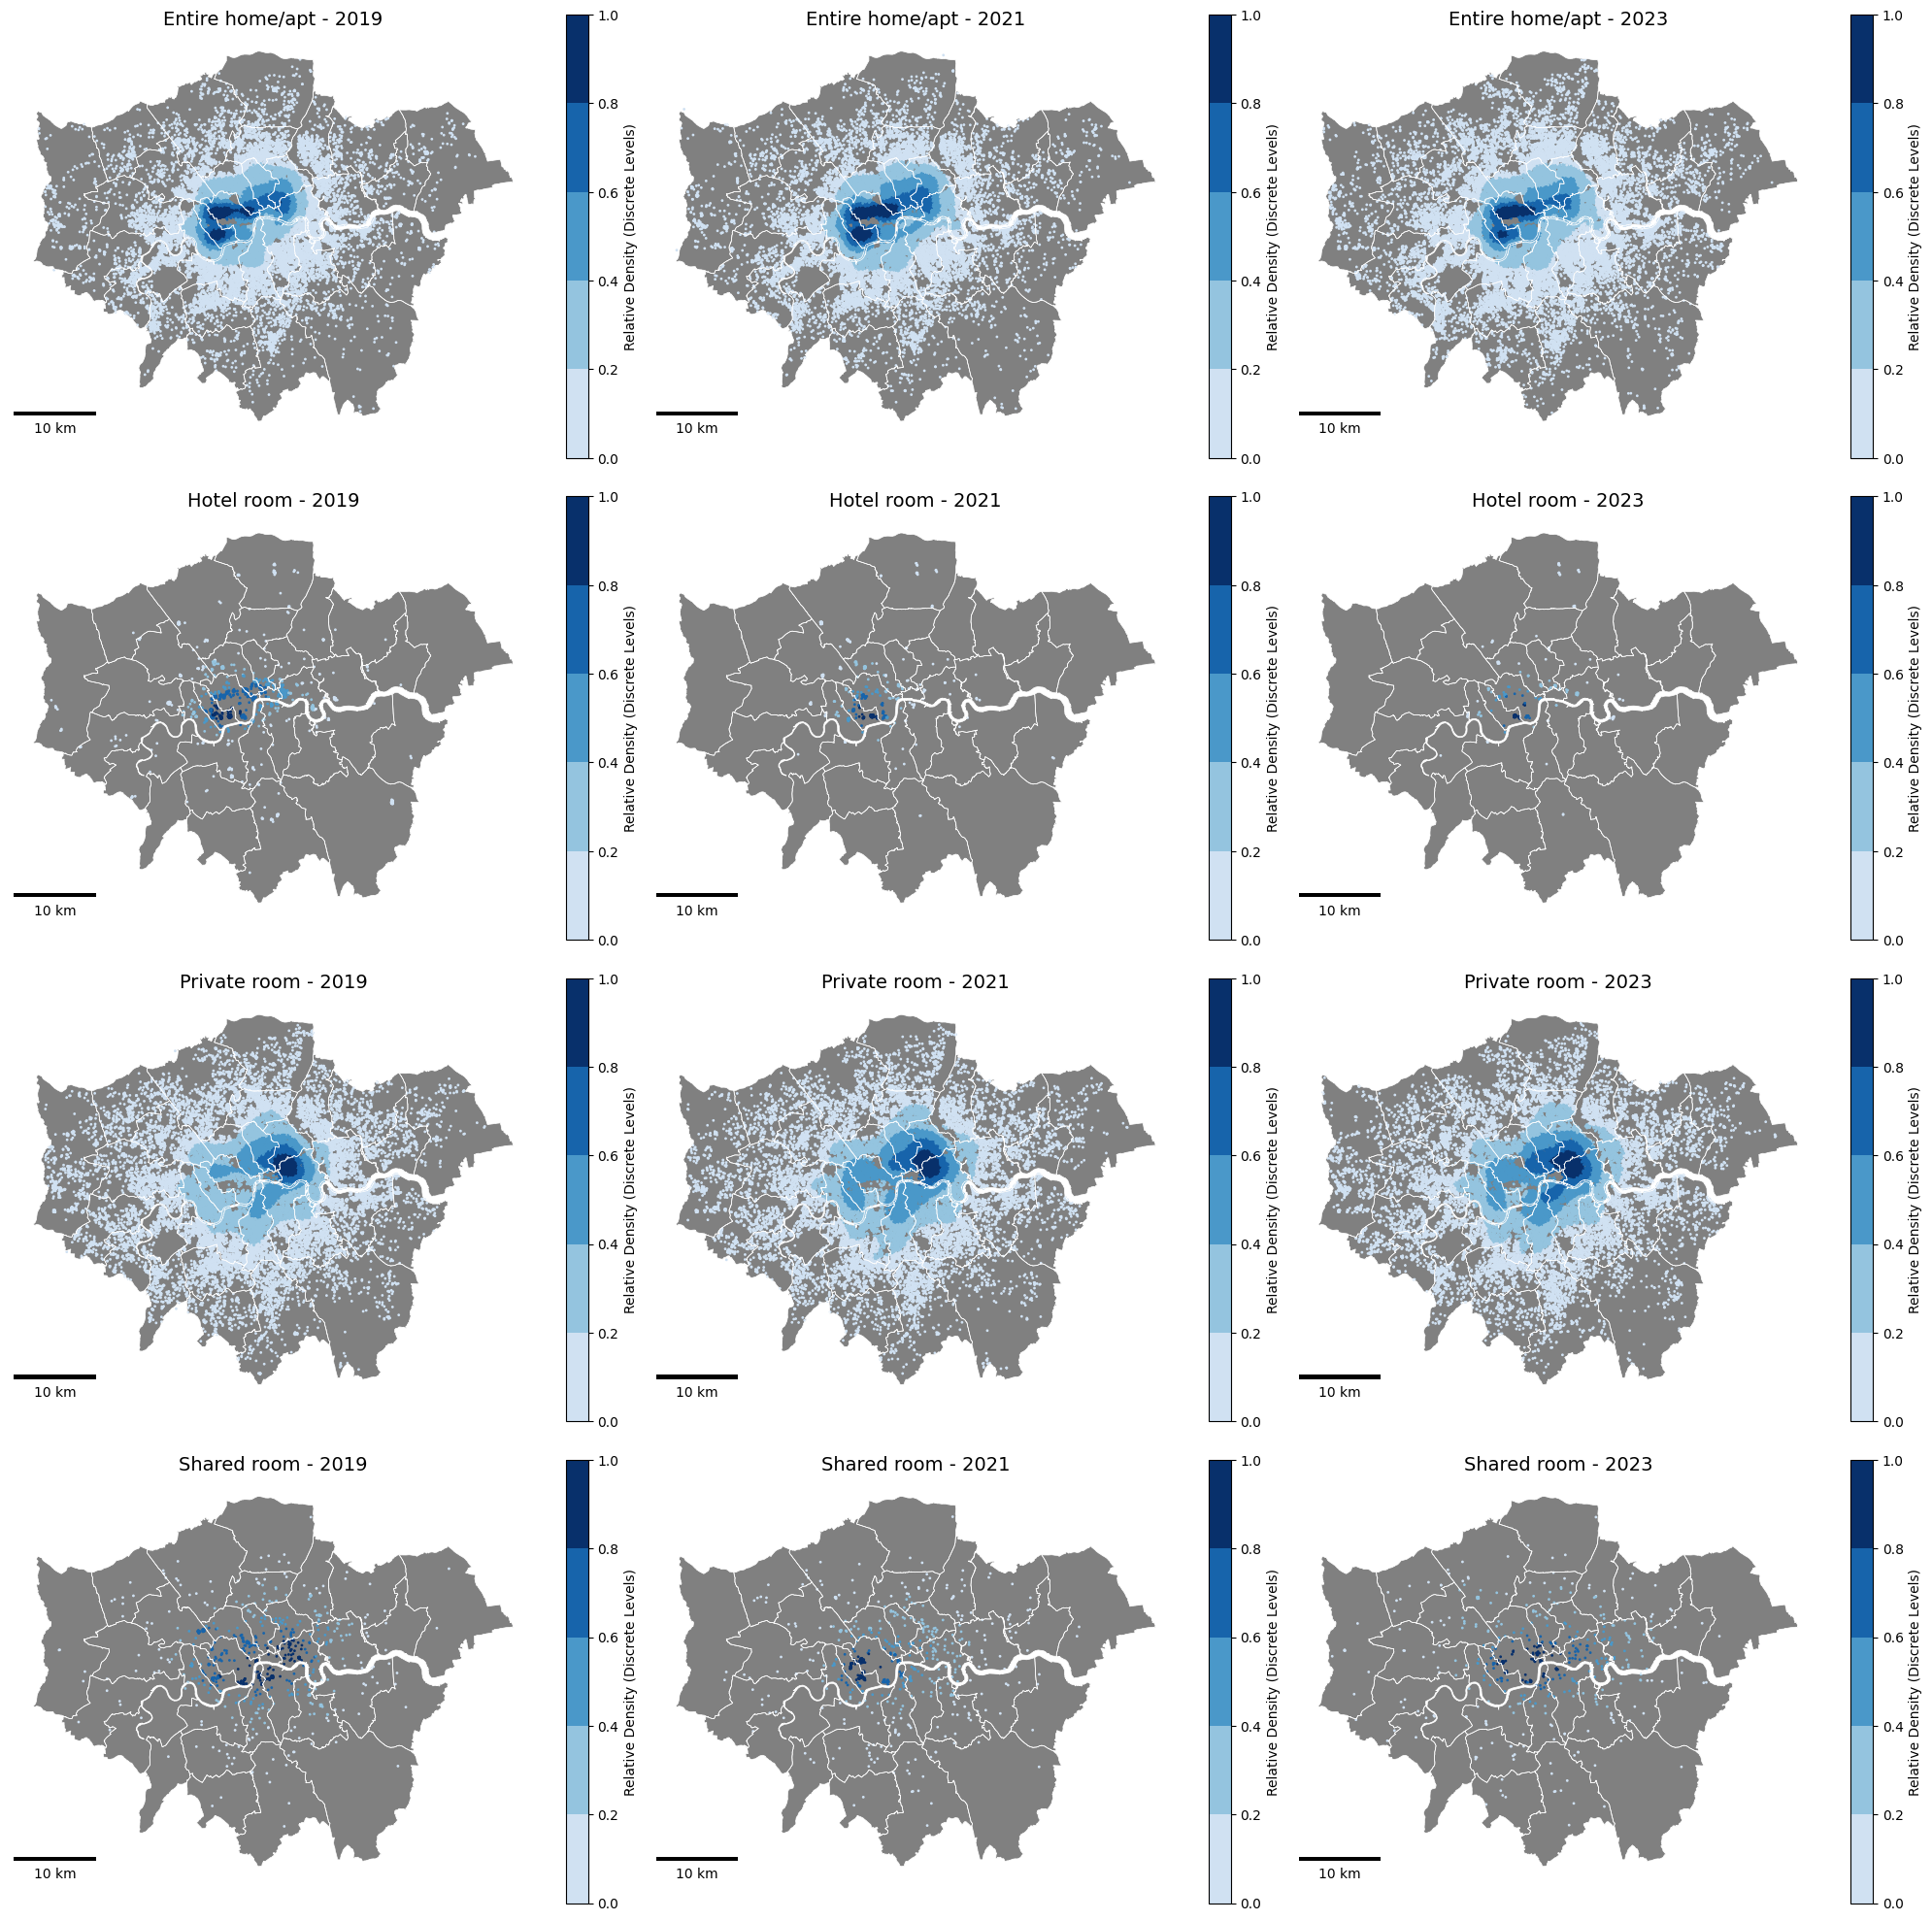

In [11]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib_scalebar.scalebar import ScaleBar

# 数据和伦敦的行政区 shapefile
csv_urls = {
    2019: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2019_data.csv",
    2021: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2021_data.csv",
    2023: "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/Cleaned%20Data/cleaned_2023_data.csv"
}
shapefile_url = "https://github.com/ukilay/PANA-FSDS-GROUP/raw/main/data/London_Borough/London_Borough_Excluding_MHW.shp"

# 读取伦敦边界 shapefile 并将其投影到 EPSG:27700（英国国家网格坐标系）
boroughs = gpd.read_file(shapefile_url)
boroughs = boroughs.to_crs(epsg=27700)

# 定义房源类型
room_types = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

# 创建 4 行 3 列的子图
fig, axes = plt.subplots(len(room_types), len(csv_urls), figsize=(20, 20))

# 定义颜色映射规则
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
orig_cmap = plt.get_cmap('Blues')
newcolors = orig_cmap(np.linspace(0.2, 1, len(bins)-1))
new_cmap = ListedColormap(newcolors)
norm = BoundaryNorm(bins, ncolors=new_cmap.N, extend='neither')
mappable = ScalarMappable(norm=norm, cmap=new_cmap)
mappable.set_array([])

# 遍历房源类型和年份
for row, rtype in enumerate(room_types):
    for col, year in enumerate(csv_urls.keys()):
        df = pd.read_csv(csv_urls[year])
        df = df[df['room_type'] == rtype]
        ax = axes[row, col]

        if df.empty:
            # 无数据时显示灰色底图
            boroughs.plot(ax=ax, facecolor='grey')
            ax.set_title(f"{rtype} - {year}\nNo Data", fontsize=14)
            ax.axis('off')
            continue

        # 确保有经纬度列
        if 'longitude' not in df.columns or 'latitude' not in df.columns:
            raise ValueError(f"{year}年的数据中缺少经纬度列（longitude或latitude）。")

        # 转换点数据为 GeoDataFrame，并投影到 EPSG:27700
        gdf = gpd.GeoDataFrame(
            df,
            geometry=gpd.points_from_xy(df.longitude, df.latitude),
            crs='EPSG:4326'  # 数据原始坐标系
        )
        gdf = gdf.to_crs(epsg=27700)  # 转换为 EPSG:27700 坐标系

        # KDE 密度计算
        xy = np.vstack([gdf.geometry.x, gdf.geometry.y])
        kde = gaussian_kde(xy, bw_method='silverman')
        kde_values = kde(xy)
        norm_kde_values = kde_values / max(kde_values)

        # 绘制地图
        boroughs.plot(ax=ax, facecolor='grey')  # 绘制背景地图
        gdf.plot(ax=ax, marker='o', color=new_cmap(norm(norm_kde_values)), markersize=1)  # 绘制点
        boroughs.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5, alpha=1.0, zorder=3)  # 绘制边界

        # 添加标题
        ax.set_title(f"{rtype} - {year}", fontsize=14)
        ax.axis('off')

        # 添加比例尺
        scalebar = ScaleBar(
            1,  # 比例尺单位长度，1代表地图单位（米）
            units="m",  # 单位为米
            dimension="si-length",  # 长度单位
            location="lower left",  # 比例尺位置
            scale_loc="bottom",  # 比例尺显示方向
            color="black",
            box_color="white",
            box_alpha=0.7
        )
        ax.add_artist(scalebar)

        # 添加颜色条
        cb = plt.colorbar(mappable, ax=ax, fraction=0.04, pad=0.05, boundaries=bins, ticks=bins)
        cb.set_label("Relative Density (Discrete Levels)")

plt.tight_layout()
plt.savefig('All_room_type_Distribution.png', dpi=300)
plt.show()